In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
covid_df = pd.read_csv(r'C:\Users\chalamalla eshwar\Desktop\research work\Covid Dataset.csv')
covid_df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
covid_df.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [6]:
covid_df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [8]:
covid_df.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [9]:
covid_df.isnull().head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
covid_df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [13]:

# Showing the Count of NANs
print(covid_df.isnull().sum())

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64


In [40]:
cd=covid_df.replace({'No':0,'Yes':1})
cd

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


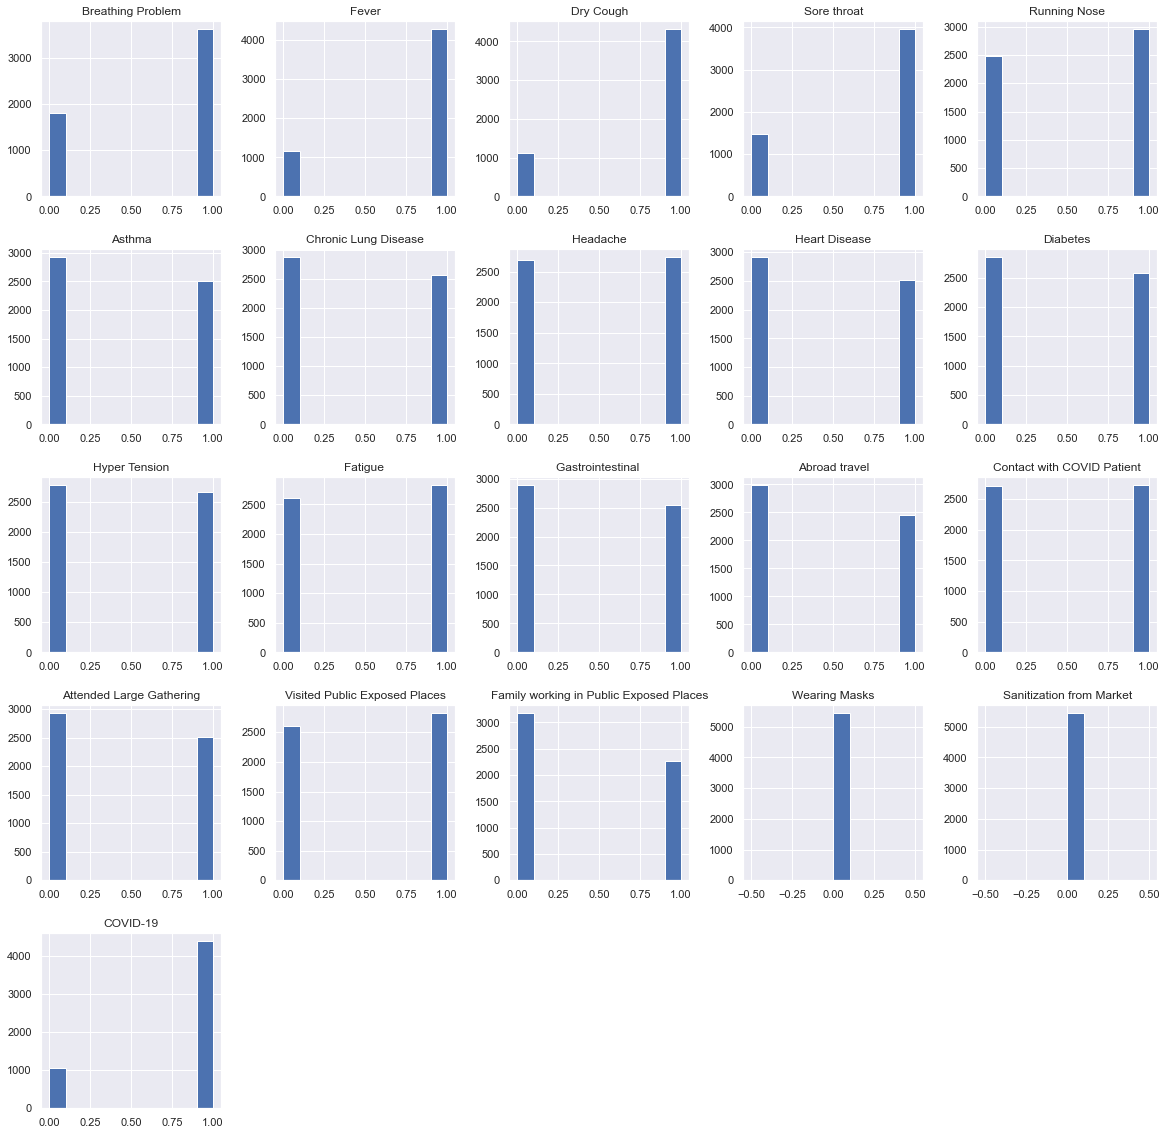

In [26]:
p = cd.hist(figsize = (20,20))

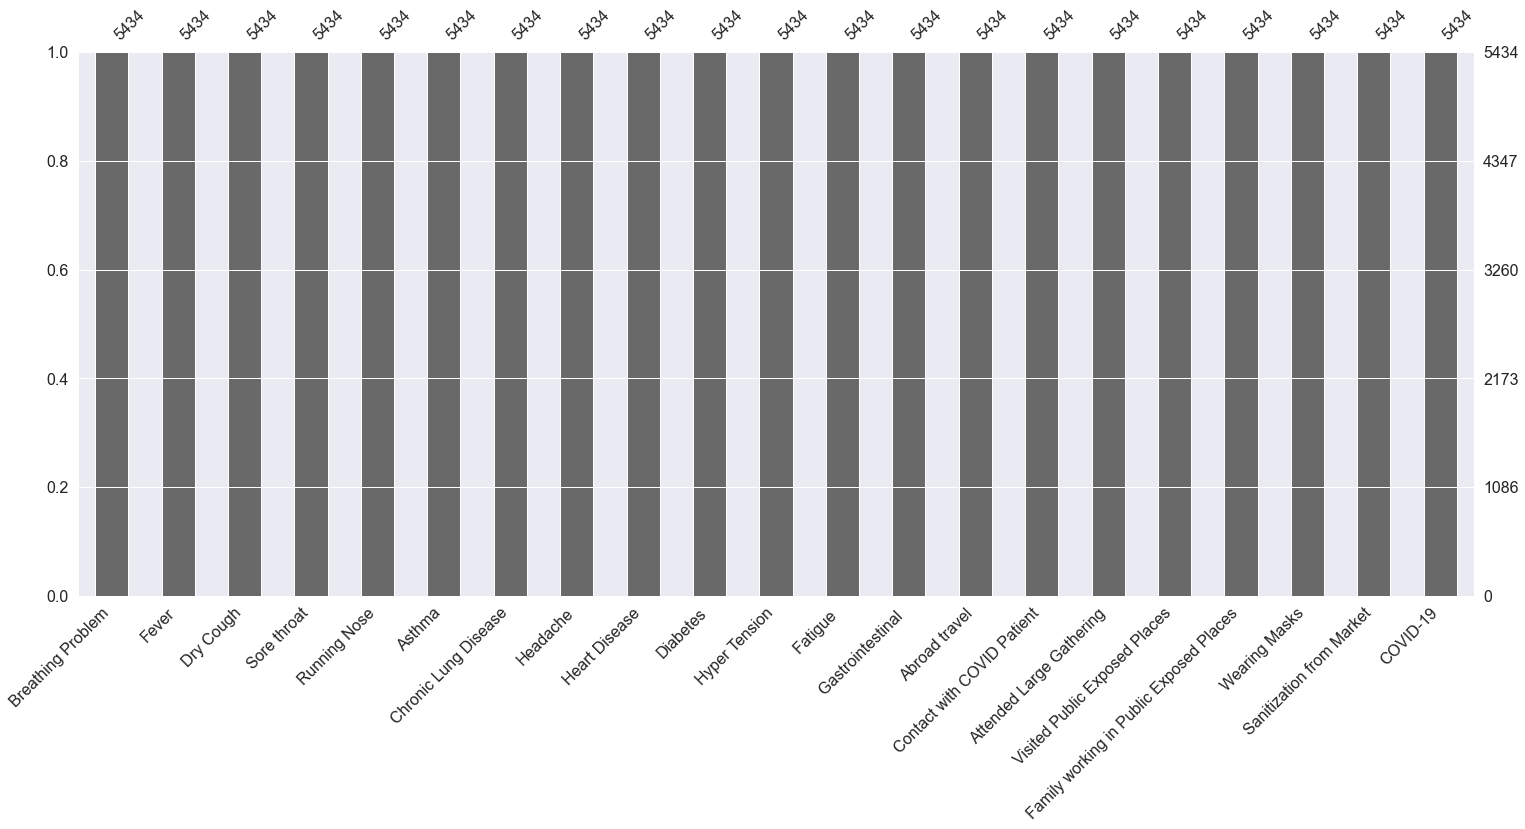

In [27]:
p = msno.bar(cd)

In [47]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}

In [59]:
colors =cd["COVID-19"].map(lambda x: color_wheel.get(x + 1))

In [68]:
print(cd.value_counts())

Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  Chronic Lung Disease  Headache  Heart Disease  Diabetes  Hyper Tension  Fatigue   Gastrointestinal   Abroad travel  Contact with COVID Patient  Attended Large Gathering  Visited Public Exposed Places  Family working in Public Exposed Places  Wearing Masks  Sanitization from Market  COVID-19
1                  1      1          1            1             0       1                     0         0              1         1              0         0                  1              1                           1                         0                              1                                        0              0                         1           115
                                                                1       0                     1         0              0         0              0         1                  1              1                           1                         1                      

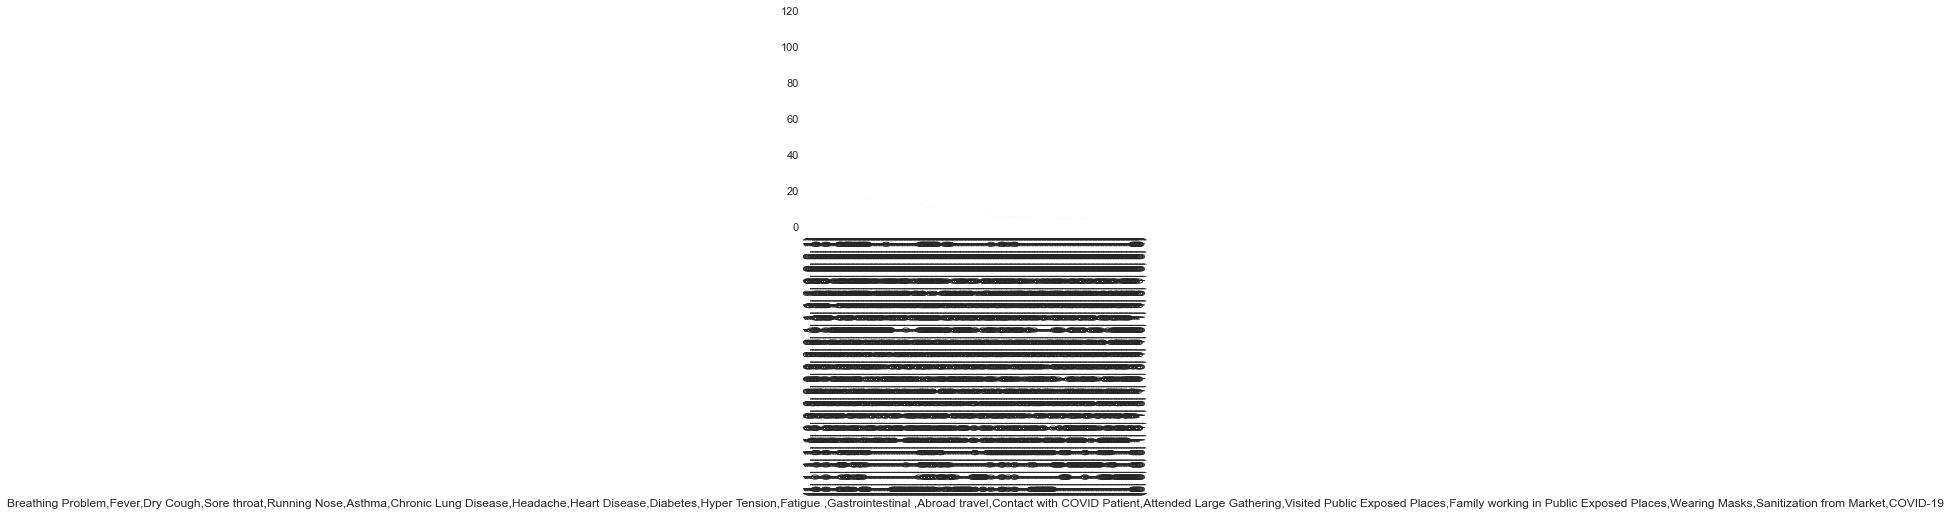

In [67]:
p=cd.value_counts().plot(kind="bar")

In [84]:
plt.subplot(121), sns.distplot(cd['Dry Cough'])
plt.subplot(122), cd['Dry Cough'].plot.box(figsize=(500,100))
plt.show()

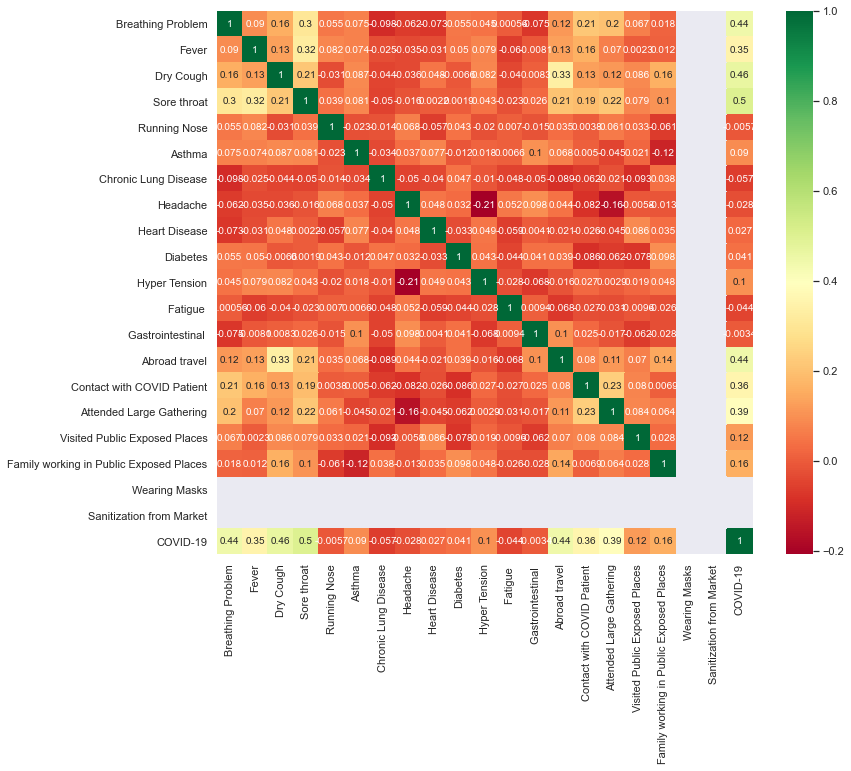

In [70]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(cd.corr(), annot=True,cmap ='RdYlGn')

In [71]:
cd.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [86]:
sc_X = StandardScaler()



In [92]:
X =  pd.DataFrame(sc_X.fit_transform(cd.drop(["COVID-19"],axis = 1)), columns=['Breathing Problem',
'Fever',                                    
'Dry Cough' ,                                 
'Sore throat' ,                               
'Running Nose' ,                              
'Asthma'    ,                                 
'Chronic Lung Disease'  ,                     
'Headache'    ,                               
'Heart Disease'  ,                            
'Diabetes'  ,                                 
'Hyper Tension'  ,                            
'Fatigue'  ,                                  
'Gastrointestinal' ,                          
'Abroad travel',                              
'Contact with COVID Patient',               
'Attended Large Gathering',                  
'Visited Public Exposed Places',             
'Family working in Public Exposed Places',    
'Wearing Masks' ,                             
'Sanitization from Market' ])

In [95]:
X.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market
0,0.707888,0.521254,0.511534,0.612088,0.916944,-0.927879,-0.945537,-1.007018,-0.930974,1.048661,1.020076,0.962428,1.063083,-0.906452,0.996693,-0.926506,0.962783,1.184187,0.0,0.0
1,0.707888,0.521254,0.511534,0.612088,-1.090579,1.077727,1.057600,0.993031,-0.930974,-0.953597,-0.980319,0.962428,-0.940661,-0.906452,-1.003318,1.079324,0.962783,-0.844461,0.0,0.0
2,0.707888,0.521254,0.511534,0.612088,0.916944,1.077727,1.057600,0.993031,-0.930974,1.048661,-0.980319,0.962428,1.063083,1.103202,-1.003318,-0.926506,-1.038656,-0.844461,0.0,0.0
3,0.707888,0.521254,0.511534,-1.633751,-1.090579,1.077727,-0.945537,-1.007018,1.074144,1.048661,-0.980319,-1.039039,-0.940661,1.103202,-1.003318,1.079324,0.962783,-0.844461,0.0,0.0
4,0.707888,0.521254,0.511534,0.612088,0.916944,-0.927879,1.057600,0.993031,1.074144,1.048661,1.020076,-1.039039,1.063083,-0.906452,0.996693,-0.926506,0.962783,-0.844461,0.0,0.0


In [99]:
y =cd['COVID-19']
y

0       1
1       1
2       1
3       1
4       1
       ..
5429    1
5430    1
5431    0
5432    0
5433    0
Name: COVID-19, Length: 5434, dtype: int64

In [100]:
X = cd.drop('COVID-19', axis=1)
y = cd['COVID-19']

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [102]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [103]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.9835164835164835


In [104]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.9810479375696767


In [105]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[ 329   10]
 [  24 1431]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       339
           1       0.99      0.98      0.99      1455

    accuracy                           0.98      1794
   macro avg       0.96      0.98      0.97      1794
weighted avg       0.98      0.98      0.98      1794



In [106]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.9810479375696767


In [108]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[ 329   10]
 [  24 1431]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       339
           1       0.99      0.98      0.99      1455

    accuracy                           0.98      1794
   macro avg       0.96      0.98      0.97      1794
weighted avg       0.98      0.98      0.98      1794



In [109]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

[20:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
from sklearn import metrics

xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.9810479375696767


In [111]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[ 329   10]
 [  24 1431]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       339
           1       0.99      0.98      0.99      1455

    accuracy                           0.98      1794
   macro avg       0.96      0.98      0.97      1794
weighted avg       0.98      0.98      0.98      1794



In [112]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [113]:
svc_pred = svc_model.predict(X_test)

In [114]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.9810479375696767


In [115]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[ 329   10]
 [  24 1431]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       339
           1       0.99      0.98      0.99      1455

    accuracy                           0.98      1794
   macro avg       0.96      0.98      0.97      1794
weighted avg       0.98      0.98      0.98      1794



In [116]:
rfc.feature_importances_

array([0.13765925, 0.07195073, 0.13294565, 0.16362117, 0.01959429,
       0.01809321, 0.01629182, 0.01645218, 0.01973034, 0.01676921,
       0.01705606, 0.01769396, 0.01599798, 0.12832743, 0.06787173,
       0.09647211, 0.02110497, 0.0223679 , 0.        , 0.        ])

<AxesSubplot:>

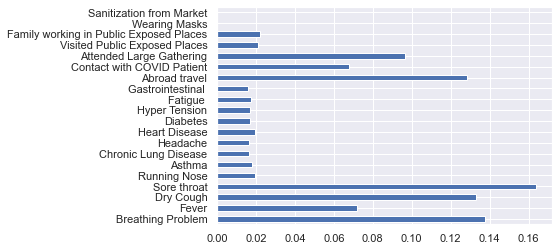

In [117]:
(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

In [118]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [119]:
cd.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [120]:
cd.tail()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5433,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [121]:
rfc.predict([[1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0]])

array([1], dtype=int64)

In [122]:
rfc.predict([[1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0]])

array([1], dtype=int64)

In [123]:
rfc.predict([[0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,0,0]])

array([0], dtype=int64)

In [124]:
rfc.predict([[1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1]])

array([1], dtype=int64)

In [125]:
#eshwar
rfc.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]])

array([0], dtype=int64)

In [126]:
#sai sathwik
rfc.predict([[1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]])

array([0], dtype=int64)